In [10]:
import numpy as np
import matplotlib.pyplot as plt
from src.streaming_factors.data_stream import simulate_returns, stream_returns
from src.streaming_factors.online_factor import OnlineFactorEstimator


In [11]:
num_assets = 5
num_steps = 1000

returns = simulate_returns(num_assets=num_assets, num_steps=num_steps, seed=0)


In [12]:
estimator = OnlineFactorEstimator(num_assets=num_assets, step_size=0.01)

history = []
for t, x in enumerate(stream_returns(returns)):
    estimator.update(x)
    history.append(estimator.get_factor().copy())

history = np.array(history)


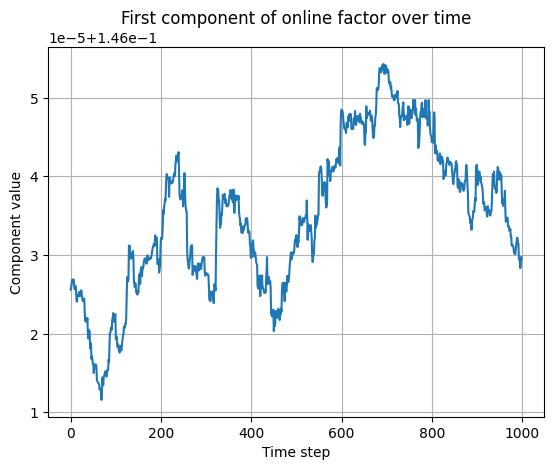

In [13]:
plt.plot(history[:, 0])
plt.title("First component of online factor over time")
plt.xlabel("Time step")
plt.ylabel("Component value")
plt.grid(True)
plt.show()


In [14]:
cov = np.cov(returns, rowvar=False)

eigvals, eigvecs = np.linalg.eigh(cov)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

true_factor = eigvecs[:, 0]

eigvals[:5], true_factor


(array([1.12165278e-04, 1.04444025e-04, 9.69485210e-05, 9.29663034e-05,
        8.86686213e-05]),
 array([-0.57526899,  0.58525687,  0.32182472,  0.19050572,  0.43206064]))

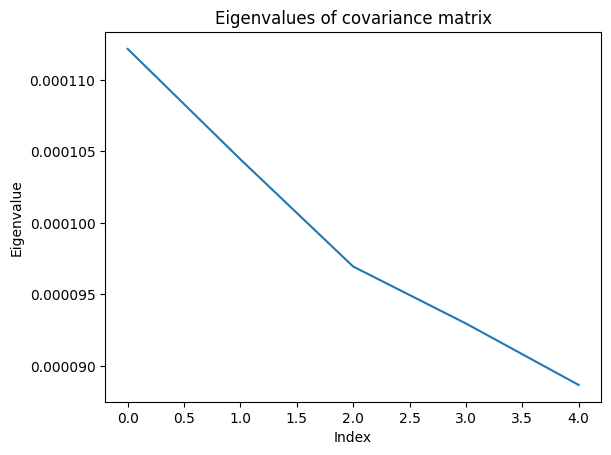

In [15]:
plt.plot(eigvals)
plt.title("Eigenvalues of covariance matrix")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()


In [16]:
history = np.array(history) 

In [17]:
def angle_between(u, v):
    u = u / np.linalg.norm(u)
    v = v / np.linalg.norm(v)
    cos_theta = np.clip(np.dot(u, v), -1.0, 1.0)
    return np.degrees(np.arccos(cos_theta))

angles = [angle_between(w_t, true_factor) for w_t in history]


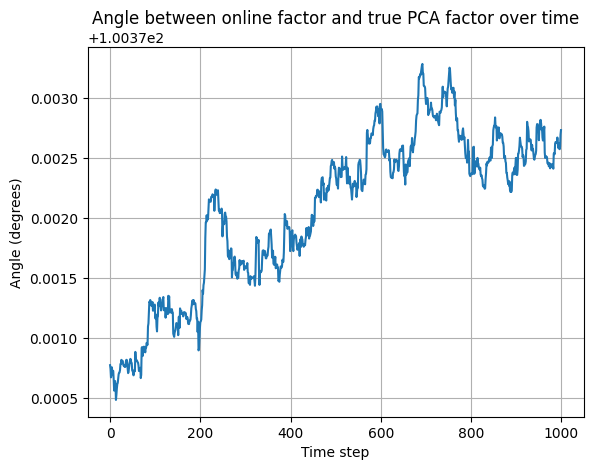

In [18]:
plt.plot(angles)
plt.title("Angle between online factor and true PCA factor over time")
plt.xlabel("Time step")
plt.ylabel("Angle (degrees)")
plt.grid(True)
plt.show()
